# **IMPORTING ALL IMPORTANT LIBRARIES** 

In [196]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **LOAD DATASET**

In [197]:
data = pd.read_csv('train_data.csv')
df = data.copy()

In [198]:
df.shape

(111311, 17)

In [199]:
pd.concat([df.head(5), df.sample(5), df.tail(5)])

,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status
0,10608026,01-01-2014,C5,36 months,MORTGAGE,665,9,70000.000,16.240,debt_consolidation,7200.000,Individual,253.990,Verified,4648.000,11.000,0.000
1,10235120,01-01-2014,E5,36 months,MORTGAGE,660,8,65000.000,23.400,home_improvement,6000.000,Individual,233.520,Source Verified,14051.000,11.000,1.000
2,10705805,01-01-2014,D2,36 months,MORTGAGE,660,7,73000.000,17.570,other,8000.000,Individual,287.500,Verified,14885.000,11.000,0.000
3,11044991,01-01-2014,B4,36 months,MORTGAGE,690,5,118000.000,12.850,debt_consolidation,10000.000,Individual,336.220,Source Verified,7542.000,2.000,1.000
4,10161054,01-01-2014,C3,60 months,MORTGAGE,665,5,63000.000,14.980,debt_consolidation,10000.000,Individual,237.800,Verified,6318.000,11.000,0.000
111171,74494452,01-03-2016,E5,36 months,RENT,665,0,65000.000,22.450,debt_consolidation,19200.000,Individual,737.740,Verified,14346.000,2.000,1.000
36431,28532718,01-10-2014,E4,60 months,RENT,660,0,88458.000,20.990,debt_consolidation,20150.000,Individual,545.020,Verified,13825.000,11.000,0.000
42706,39641644,01-01-2015,F1,60 months,RENT,710,1,72000.000,22.990,debt_consolidation,29600.000,Individual,834.270,Verified,3616.000,5.000,0.000
40366,34412272,01-11-2014,D2,60 months,MORTGAGE,755,0,90000.000,15.990,debt_consolidation,25000.000,Individual,607.820,Source Verified,19330.000,11.000,1.000
44265,40247486,01-01-2015,D5,36 months,MORTGAGE,700,0,31902.000,17.860,debt_consolidation,12100.000,Individual,436.600,Not Verified,20679.000,0.000,1.000


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111311 entries, 0 to 111310
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_id          111311 non-null  int64  
 1   transaction_date     111311 non-null  object 
 2   sub_grade            111311 non-null  object 
 3   term                 111311 non-null  object 
 4   home_ownership       111311 non-null  object 
 5   cibil_score          111311 non-null  int64  
 6   total_no_of_acc      111311 non-null  int64  
 7   annual_inc           111311 non-null  float64
 8   int_rate             111311 non-null  float64
 9   purpose              111311 non-null  object 
 10  loan_amnt            111310 non-null  float64
 11  application_type     111310 non-null  object 
 12  installment          111310 non-null  float64
 13  verification_status  111310 non-null  object 
 14  account_bal          111310 non-null  float64
 15  emp_length       

In [201]:
display(df.describe(include='all').T)
display(df.describe(include='float').T)
df.describe(include='object').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,111311.000,NaN,NaN,NaN,42948948.103,19885179.151,373955.000,24495109.500,44116592.000,60739229.000,76153821.000
transaction_date,111311,27,01-10-2014,6598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,111311,27,C2,12219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
term,111311,2,36 months,70029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,111311,3,MORTGAGE,52416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cibil_score,111311.000,NaN,NaN,NaN,684.355,22.856,660.000,665.000,680.000,695.000,845.000
total_no_of_acc,111311.000,NaN,NaN,NaN,0.279,0.653,0.000,0.000,0.000,0.000,10.000
annual_inc,111311.000,NaN,NaN,NaN,71387.326,60687.295,0.000,43000.000,60000.000,85000.000,8900060.000
int_rate,111311.000,NaN,NaN,NaN,15.931,3.219,12.050,13.330,14.990,17.860,28.990
purpose,111311,14,debt_consolidation,70262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
annual_inc,111311.000,71387.326,60687.295,0.000,43000.000,60000.000,85000.000,8900060.000
int_rate,111311.000,15.931,3.219,12.050,13.330,14.990,17.860,28.990
loan_amnt,111310.000,15145.330,9083.153,1000.000,8000.000,13250.000,20150.000,40000.000
installment,111310.000,453.484,267.685,33.240,265.610,387.585,597.928,1460.430
account_bal,111310.000,15800.334,20453.451,0.000,5653.000,10818.000,19635.000,875598.000
emp_length,111310.000,5.965,4.229,0.000,2.000,6.000,11.000,11.000
loan_status,111310.000,0.741,0.438,0.000,0.000,1.000,1.000,1.000


,count,unique,top,freq
transaction_date,111311,27,01-10-2014,6598
sub_grade,111311,27,C2,12219
term,111311,2,36 months,70029
home_ownership,111311,3,MORTGAGE,52416
purpose,111311,14,debt_consolidation,70262
application_type,111310,2,Individual,110951
verification_status,111310,3,Source Verified,47992


In [202]:
try:
    df.drop(['ID'], axis=1, inplace=True)
except:
    print("ID column already dropped")
df.columns

ID column already dropped


Index(['customer_id', 'transaction_date', 'sub_grade', 'term',
       'home_ownership', 'cibil_score', 'total_no_of_acc', 'annual_inc',
       'int_rate', 'purpose', 'loan_amnt', 'application_type', 'installment',
       'verification_status', 'account_bal', 'emp_length', 'loan_status'],
      dtype='object')

In [203]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              1
application_type       1
installment            1
verification_status    1
account_bal            1
emp_length             1
loan_status            1
dtype: int64


In [204]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')
df.select_dtypes(include='category').columns

Index(['transaction_date', 'sub_grade', 'term', 'home_ownership', 'purpose',
       'application_type', 'verification_status'],
      dtype='object')

In [205]:
for i in df.select_dtypes(include=['category']).columns:
    print('Unique values in', i, 'are :')
    print(df[i].value_counts(dropna=False))
    print('*'*50)

Unique values in transaction_date are :
transaction_date
01-10-2014    6598
01-07-2015    6517
01-10-2015    6239
01-01-2015    5288
01-07-2014    5284
01-04-2015    5151
01-12-2015    4988
01-08-2015    4890
01-11-2015    4776
01-05-2015    4576
01-02-2016    4211
01-06-2015    4071
01-09-2015    3958
01-03-2016    3953
01-11-2014    3825
01-04-2014    3680
01-03-2015    3651
01-05-2014    3618
01-02-2015    3440
01-03-2014    3379
01-01-2016    3334
01-08-2014    3262
01-01-2014    3158
01-02-2014    3149
01-06-2014    3122
01-09-2014    1749
01-12-2014    1444
Name: count, dtype: int64
**************************************************
Unique values in sub_grade are :
sub_grade
C2    12219
C3    11790
C4    11276
C1    10521
C5     9486
D1     8216
D2     6398
D3     5701
D4     5354
D5     4482
E1     4051
E2     3623
B5     3463
E3     3044
E4     2435
E5     1986
F1     1499
B4     1343
F2     1056
F3      941
F4      681
F5      532
G1      402
G2      302
G3      214
G5      15

# **Exploratory Data Analysis**
# Univariant analysis

In [206]:
def histogram_boxplot(df, feature, figsize=(15, 7), bins=None):
    feature_data = df[feature]

    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)}, figsize=figsize)

    sns.boxplot(x=feature_data, ax=ax_box2, showmeans=True, color='yellow')
    ax_box2.set_title(f'Boxplot of {feature}')

    sns.histplot(feature_data, kde=True, ax=ax_hist2, bins=bins, color='skyblue') if bins else sns.histplot(feature_data, kde=True, ax=ax_hist2, color='skyblue')

    ax_hist2.axvline(np.mean(feature_data), color='green', linestyle='--', label='Mean')
    ax_hist2.axvline(np.median(feature_data), color='blue', linestyle='-', label='Median')

    ax_hist2.set_title(f'Distribution of {feature}')
    ax_hist2.set_xlabel(feature)
    ax_hist2.set_ylabel('Frequency')

    ax_hist2.legend()

    plt.tight_layout()
    plt.show()

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

def perc_on_bar(feature):
    sns.set(rc={'figure.figsize':(15,7)})
    ax = sns.countplot(x=feature, data=data, palette='mako')

    total = len(feature)
    for p in ax.patches:
        percentage = 100 * p.get_height() / total
        percentage_label = f"{percentage:.1f}%"
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage_label, (x, y), size=12)

    plt.show()


In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

def target_plot(x, target='default'):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0, 0].set_title('Distribution of default')
    sns.distplot(data[(data[target] == 1)][x], ax=axs[0, 0], color='teal')
    axs[0, 1].set_title('Distribution of non-default')
    sns.distplot(data[(data[target] == 0)][x], ax=axs[0, 1], color='orange')

    axs[1, 0].set_title('Boxplot w.r.t default')
    sns.boxplot(data[target], data[x], ax=axs[1, 0], palette='gist_rainbow')
    axs[1, 1].set_title('Boxplot w.r.t non-default - Without outliers')
    sns.boxplot(data[target], data[x], ax=axs[1, 1], showfliers=False, palette='gist_rainbow')
    plt.tight_layout()
    plt.show()


In [209]:
df.select_dtypes(include='integer').columns

Index(['customer_id', 'cibil_score', 'total_no_of_acc'], dtype='object')

In [210]:
df.select_dtypes(include='float').columns

Index(['annual_inc', 'int_rate', 'loan_amnt', 'installment', 'account_bal',
       'emp_length', 'loan_status'],
      dtype='object')

**customer_id**

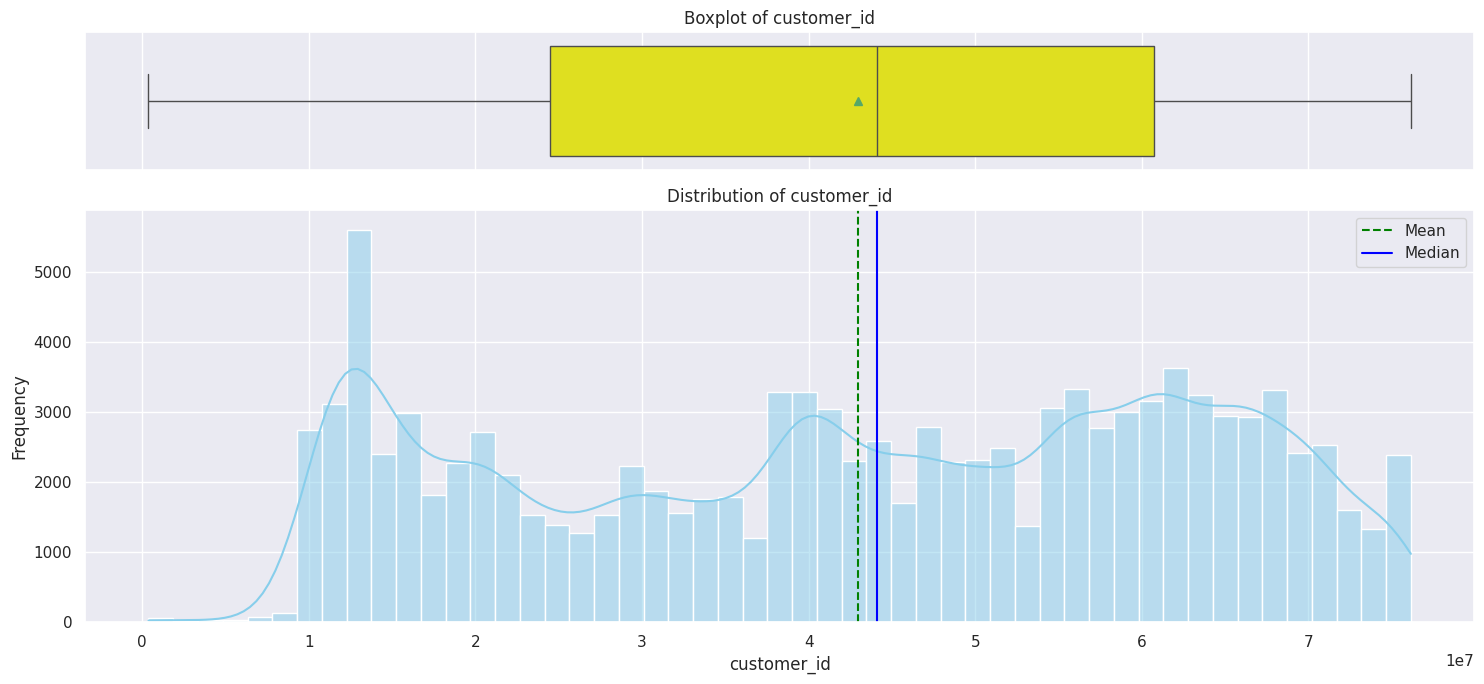

In [211]:
histogram_boxplot(df, 'customer_id')

**cibil_score**

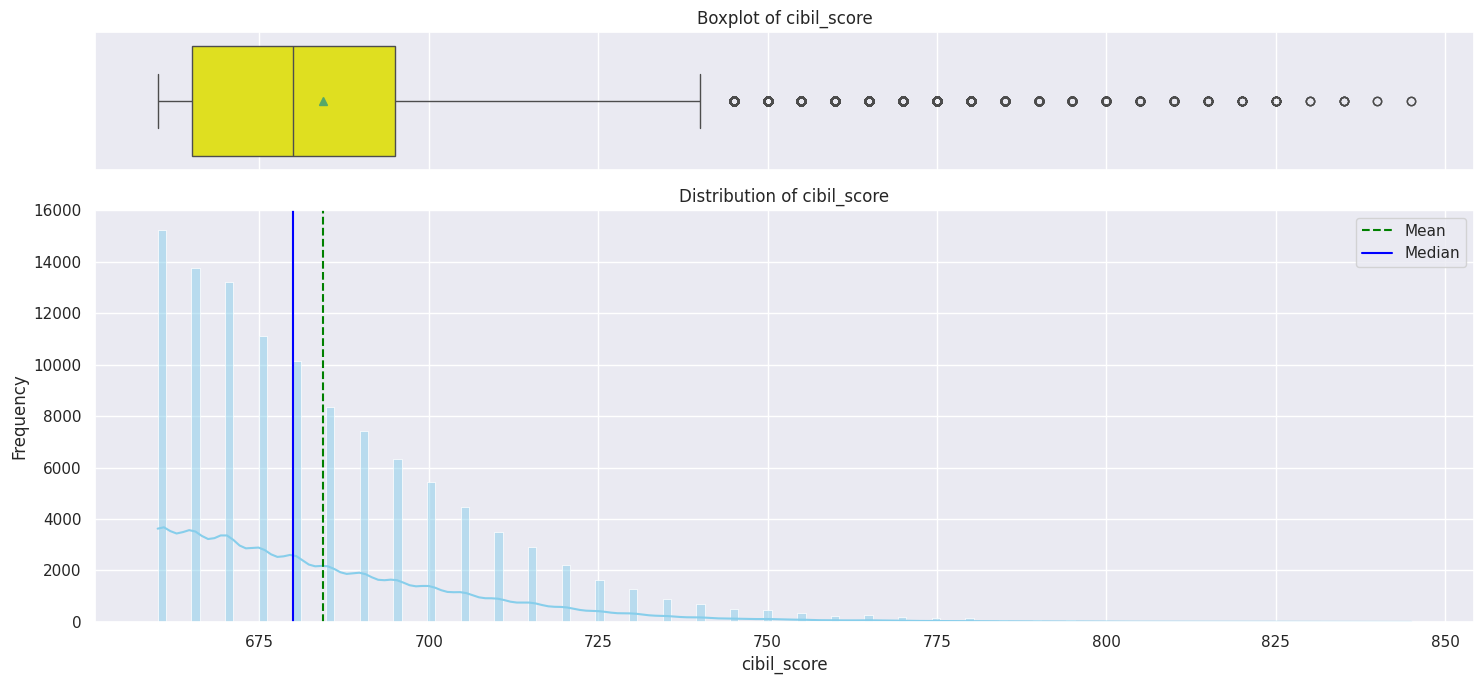

In [212]:
histogram_boxplot(df, 'cibil_score')

**total_no_of_acc**

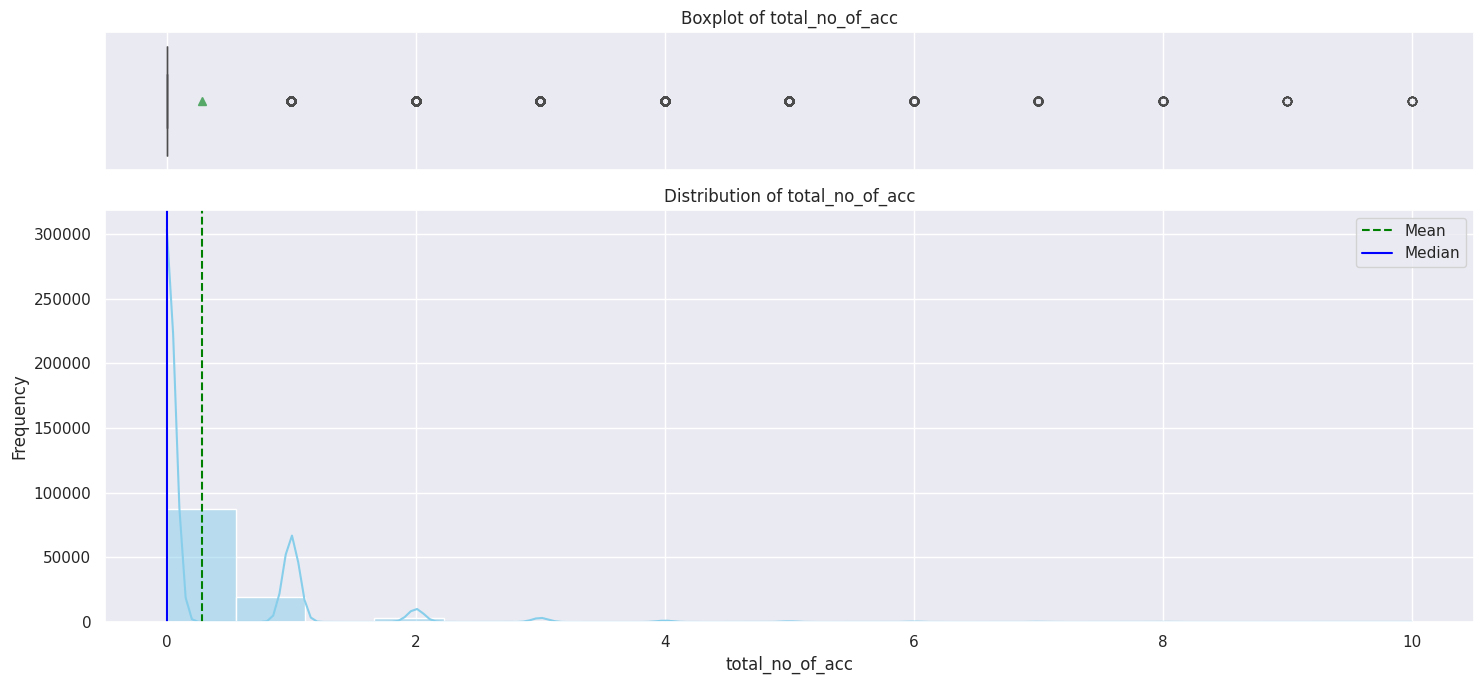

In [213]:
histogram_boxplot(df, 'total_no_of_acc')

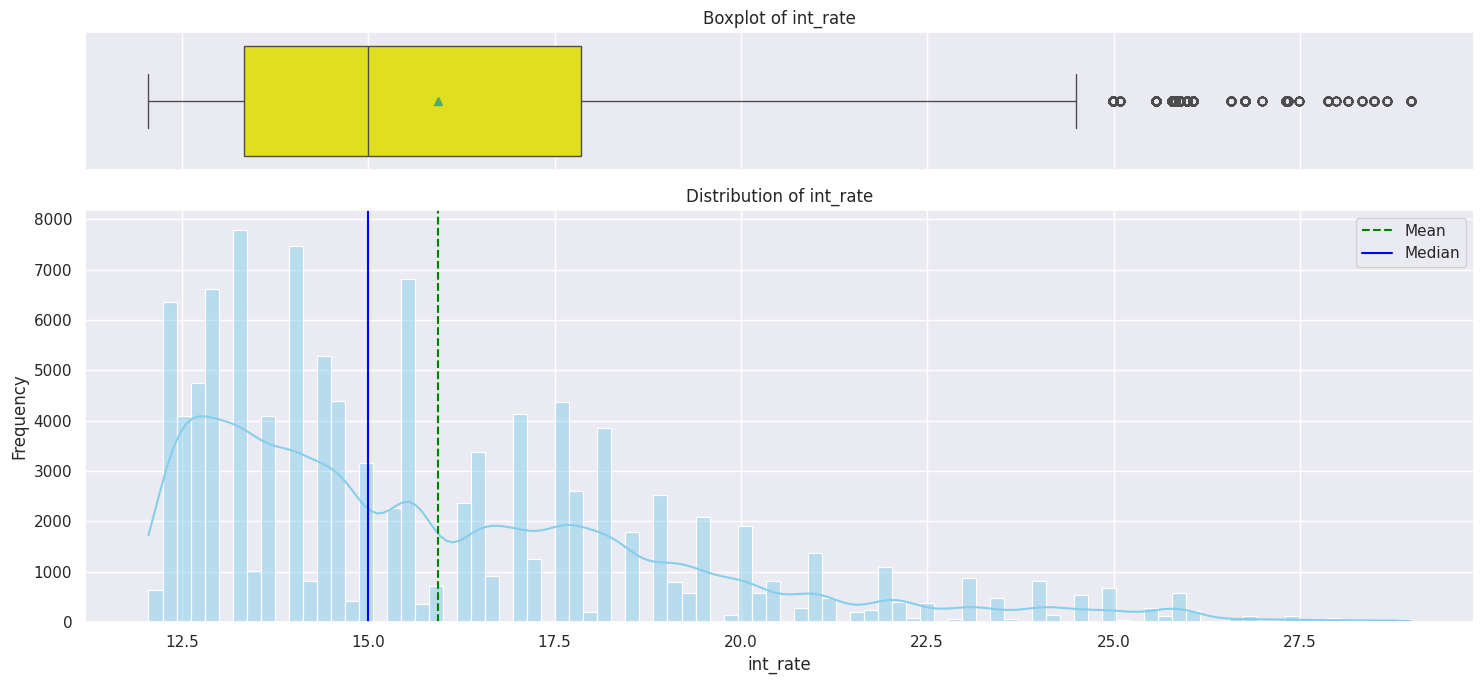

In [214]:
histogram_boxplot(df, 'int_rate')

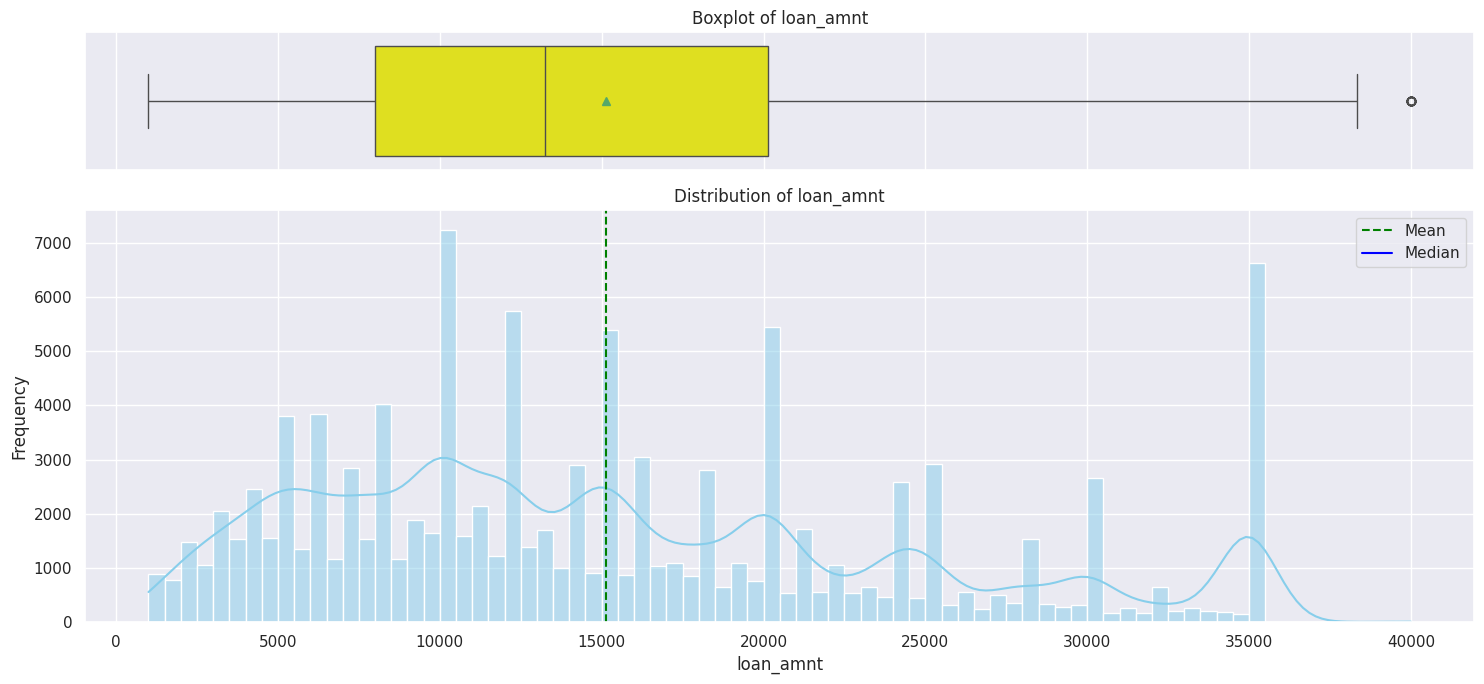

In [215]:
histogram_boxplot(df, 'loan_amnt')

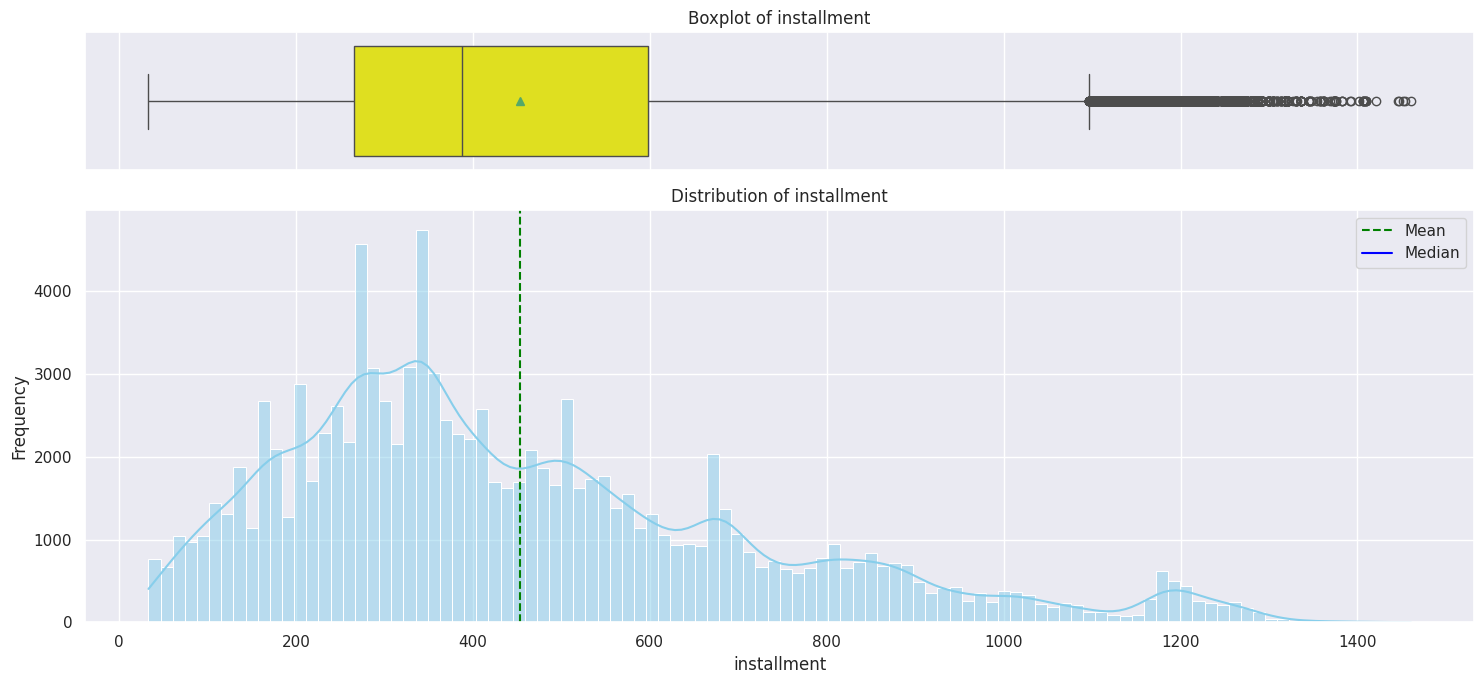

In [216]:
histogram_boxplot(df, 'installment')

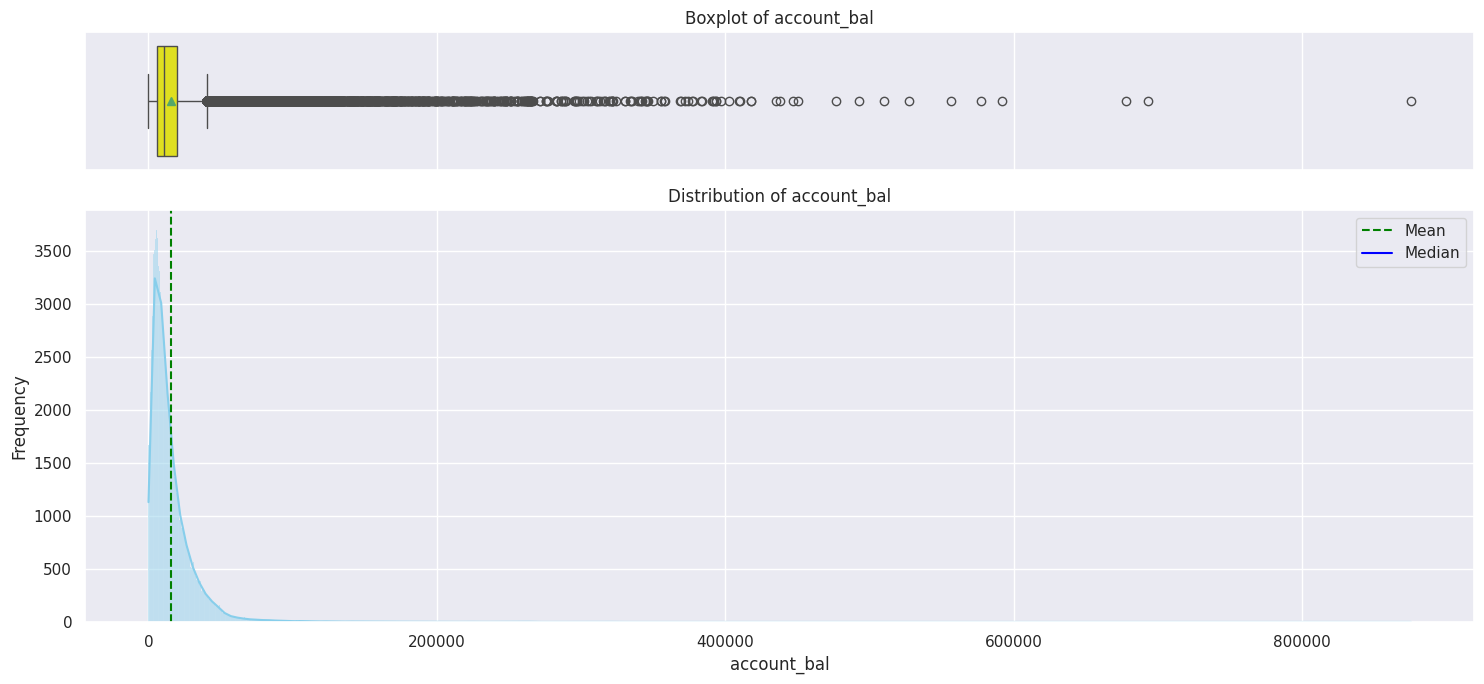

In [217]:
histogram_boxplot(df, 'account_bal')

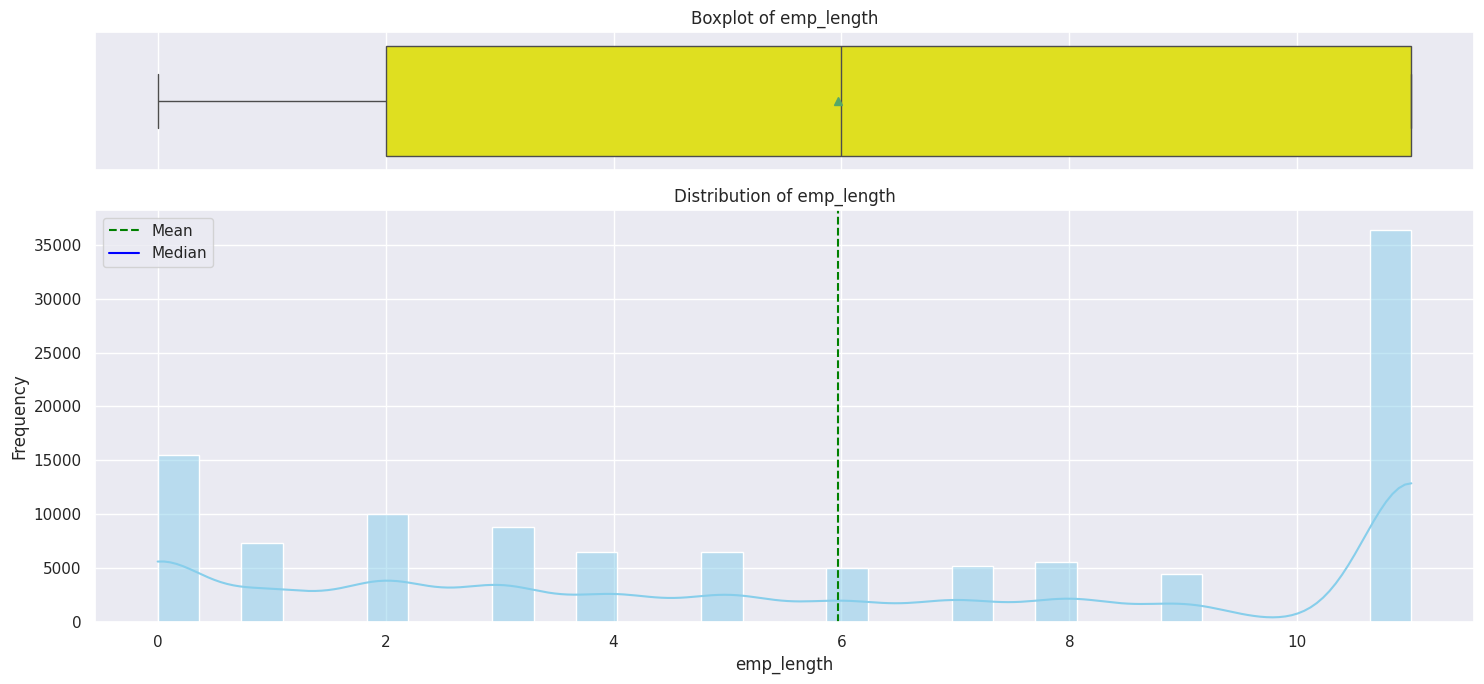

In [218]:
histogram_boxplot(df, 'emp_length')

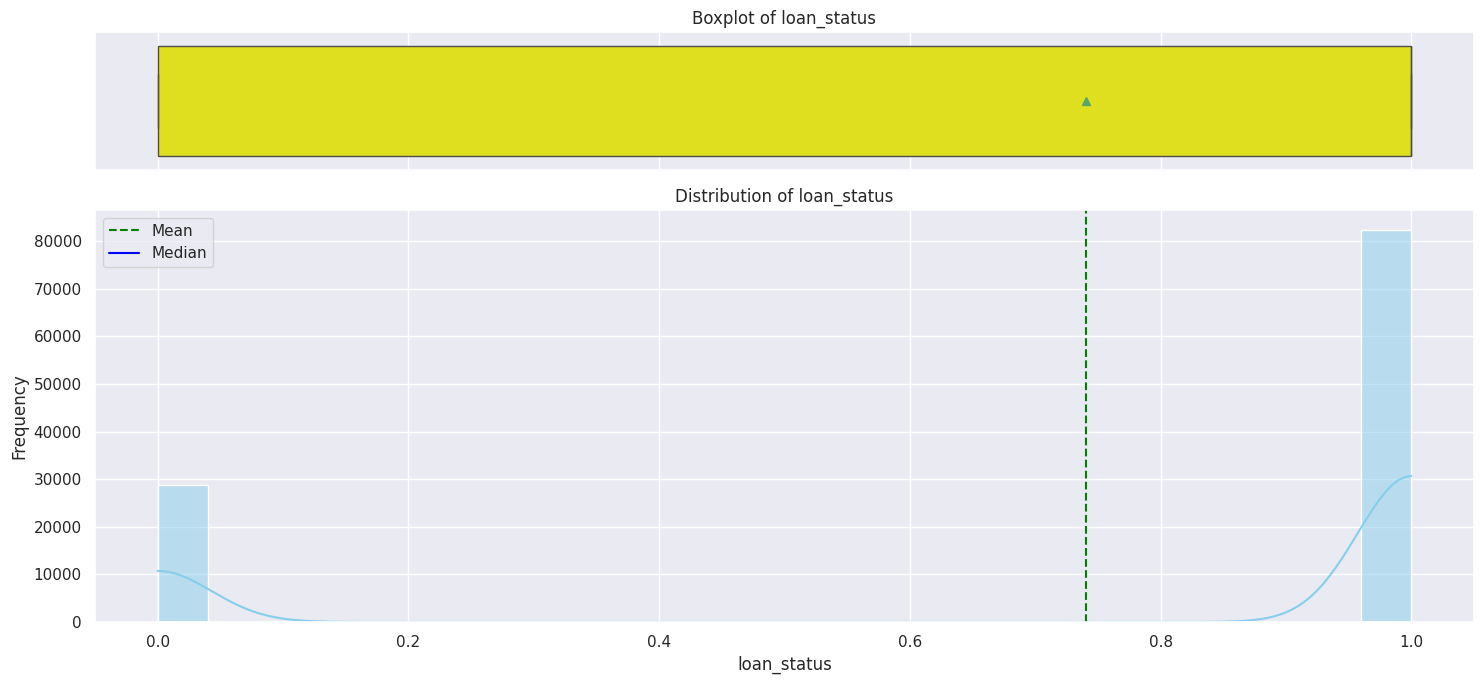

In [219]:
histogram_boxplot(df, 'loan_status')

# **BIVARIANT ANALYSIS**

In [220]:
## Function to plot stacked bar chart
def stacked_plot(x, y, show_df=True):
    """
    Shows stacked plot from x and y pandas data series
    x: pandas data series
    y: pandas data series
    show_df: flag to show dataframe above plot (default=True)
    """
    if show_df == True:
        info = pd.crosstab(x, y, margins=True)
        info['% - 0'] = round(info[0]/info['All']*100, 2)
        info['% - 1'] = round(info[1]/info['All']*100, 2)
        display(info)

    pd.crosstab(x, y, normalize='index').plot(kind='bar', stacked=True, figsize=(10,5));

In [221]:
def show_boxplots(cols: list, feature: str, show_fliers=True, data=df): #method call to show bloxplots
    """
    Shows boxplots from pandas data series
    cols: list of column names
    feature: dataframe categorical feature
    """
    n_rows = math.ceil(len(cols)/3)
    plt.figure(figsize=(15, n_rows*5))
    for i, variable in enumerate(cols):
        plt.subplot(n_rows, 3, i+1)
        if show_fliers:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=True)
        else:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=False)
        plt.tight_layout()
        plt.title(variable, fontsize=12)
    plt.show()

In [222]:
### Function to plot distributions and Boxplots of customers
def plot_target(x, target='default'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of DEFAULT')
    sns.distplot(data[(data[target] == 1)][x], ax=axs[0,0], color='teal')
    axs[0, 1].set_title('Distribution of NON-DEFAULT')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1], color='orange')
    axs[1,0].set_title('Boxplot w.r.t default-flag')
    sns.boxplot(data[target],data[x],ax=axs[1,0], palette='mako')
    axs[1,1].set_title('Boxplot w.r.t default-flag - Without outliers')
    sns.boxplot(data[target],data[x], ax=axs[1,1], showfliers=False, palette='mako')
    plt.tight_layout()
    plt.show()

**Distribution of Numeric Features (e.g., annual_inc, loan_amnt, int_rate, cibil_score)**

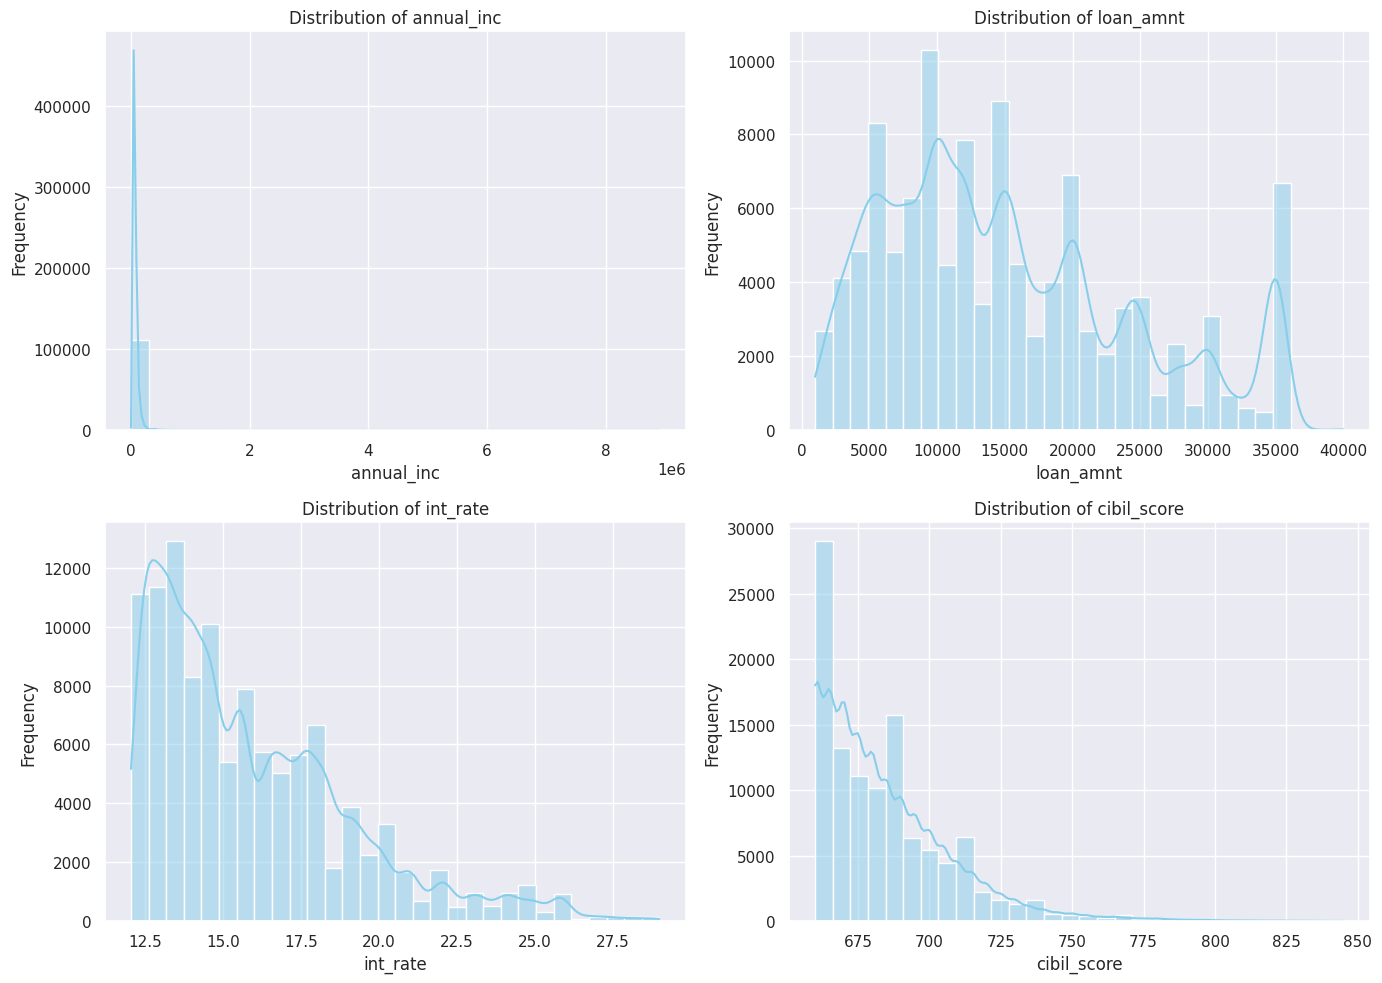

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns you want to analyze
numeric_cols = ['annual_inc', 'loan_amnt', 'int_rate', 'cibil_score']

# Set up the plot
plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Categorical Variable Distributions**

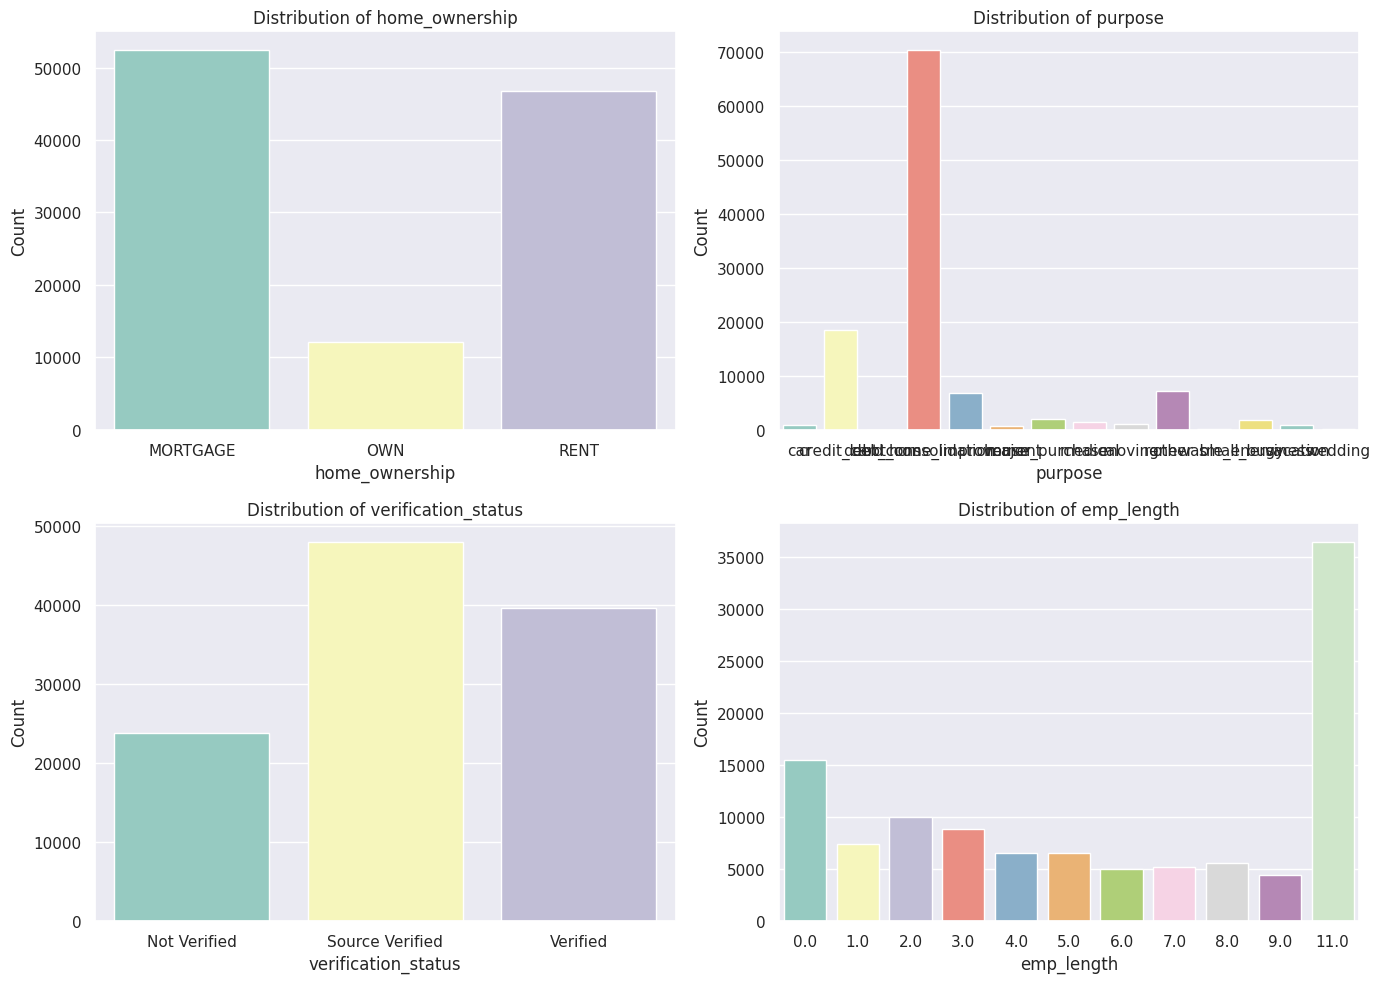

In [224]:
# Set up the plot for categorical variables
categorical_cols = ['home_ownership', 'purpose', 'verification_status', 'emp_length']

plt.figure(figsize=(14, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df, palette='Set3')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**HEAT MAP**

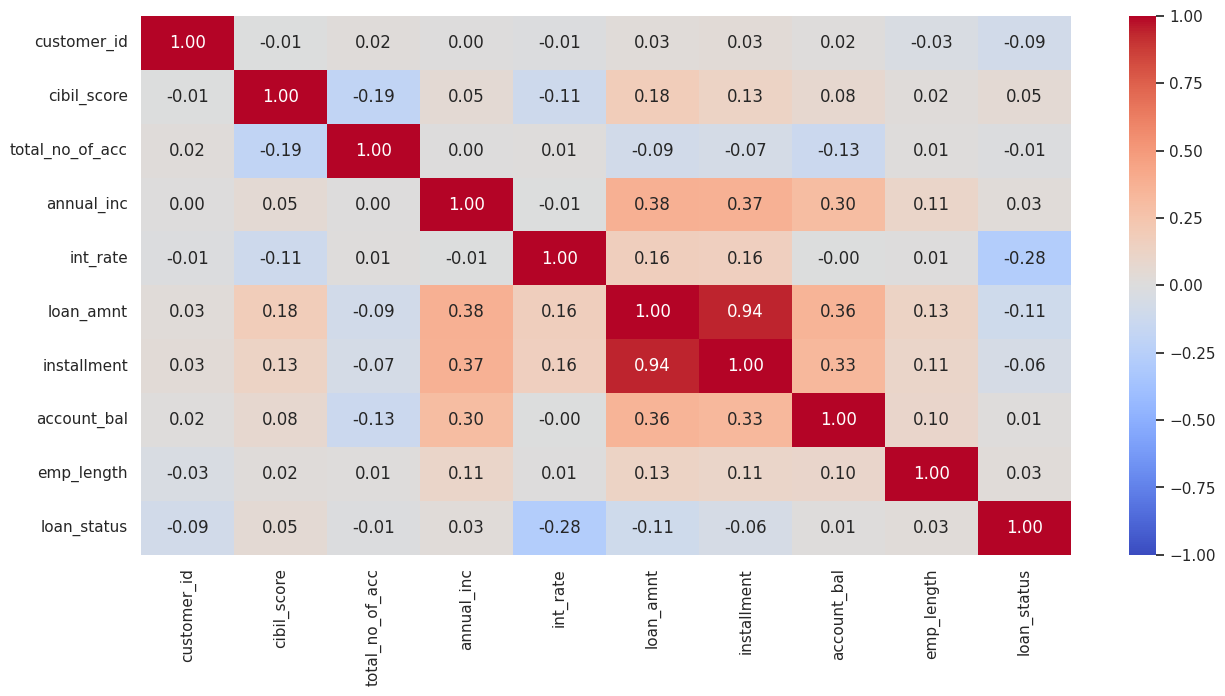

In [225]:
plt.figure(figsize=(15,7))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='coolwarm');

# **Data Preparation**

checking important libraries

In [226]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Suppress scientific notation for better readability
pd.options.display.float_format = '{:.2f}'.format

Load the dataset

In [227]:
data = pd.read_csv('train_data.csv')

Check for missing values

In [228]:
df.isnull().sum()

,0
customer_id,0
transaction_date,0
sub_grade,0
term,0
home_ownership,0
cibil_score,0
total_no_of_acc,0
annual_inc,0
int_rate,0
purpose,0


In [229]:
for i in df.select_dtypes(include=['category']).columns:
    print('Unique values in', i, 'are :')
    print(df[i].value_counts(dropna=False))
    print('*'*50)

Unique values in transaction_date are :
transaction_date
01-10-2014    6598
01-07-2015    6517
01-10-2015    6239
01-01-2015    5288
01-07-2014    5284
01-04-2015    5151
01-12-2015    4988
01-08-2015    4890
01-11-2015    4776
01-05-2015    4576
01-02-2016    4211
01-06-2015    4071
01-09-2015    3958
01-03-2016    3953
01-11-2014    3825
01-04-2014    3680
01-03-2015    3651
01-05-2014    3618
01-02-2015    3440
01-03-2014    3379
01-01-2016    3334
01-08-2014    3262
01-01-2014    3158
01-02-2014    3149
01-06-2014    3122
01-09-2014    1749
01-12-2014    1444
Name: count, dtype: int64
**************************************************
Unique values in sub_grade are :
sub_grade
C2    12219
C3    11790
C4    11276
C1    10521
C5     9486
D1     8216
D2     6398
D3     5701
D4     5354
D5     4482
E1     4051
E2     3623
B5     3463
E3     3044
E4     2435
E5     1986
F1     1499
B4     1343
F2     1056
F3      941
F4      681
F5      532
G1      402
G2      302
G3      214
G5      15

Missing Value treatement

In [230]:
df1 = df.copy()

In [231]:
# Fill missing values with the mean for numeric columns
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['installment'].fillna(data['installment'].mean(), inplace=True)
data['account_bal'].fillna(data['account_bal'].mean(), inplace=True)
data['total_no_of_acc'].fillna(data['total_no_of_acc'].mean(), inplace=True)


In [232]:
# Mapping job experience (emp_length in your dataset)
job_experience = {'<5 Years': 0, '6-10 years': 1, '10+ years': 2}
data['emp_length'] = data['emp_length'].map(job_experience).astype('Int32')

# Mapping loan term
loan_term = {'36 months': 0, '60 months': 1}
data['term'] = data['term'].map(loan_term).astype('Int32')

# Mapping loan grade (if applicable; map the first letter of sub_grade)
loan_grade = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
data['grade'] = data['sub_grade'].str[0].map(loan_grade).astype('Int32')

# Mapping loan subgrade
loan_subgrade = {
    'A1': 0,  'A2': 1,  'A3': 2,  'A4': 3,  'A5': 4,
    'B1': 5,  'B2': 6,  'B3': 7,  'B4': 8,  'B5': 9,
    'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14,
    'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19,
    'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24,
    'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29,
    'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34
}
data['sub_grade'] = data['sub_grade'].map(loan_subgrade).astype('Int32')

# Mapping home ownership
home_ownership = {'MORTGAGE': 0, 'RENT': 1, 'OWN': 2, 'OTHER': 3, 'NONE': 4}
data['home_ownership'] = data['home_ownership'].map(home_ownership).astype('Int32')

# Mapping income verification status
income_verification_status = {'Verified': 0, 'Not Verified': 1, 'Source Verified': 2}
data['verification_status'] = data['verification_status'].map(income_verification_status).astype('Int32')

# Mapping loan purpose
loan_purpose = {
    'debt_consolidation': 0, 'credit_card': 1,
    'home_improvement': 2, 'other': 3, 'moving': 4
}
data['purpose'] = data['purpose'].map(loan_purpose).astype('Int32')

# Mapping application type
application_type = {'Individual': 0, 'Joint': 1}
data['application_type'] = data['application_type'].map(application_type).astype('Int32')


In [233]:
df1.head()

,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status
0,10608026,01-01-2014,C5,36 months,MORTGAGE,665,9,70000.00,16.24,debt_consolidation,7200.00,Individual,253.99,Verified,4648.00,11.00,0.00
1,10235120,01-01-2014,E5,36 months,MORTGAGE,660,8,65000.00,23.40,home_improvement,6000.00,Individual,233.52,Source Verified,14051.00,11.00,1.00
2,10705805,01-01-2014,D2,36 months,MORTGAGE,660,7,73000.00,17.57,other,8000.00,Individual,287.50,Verified,14885.00,11.00,0.00
3,11044991,01-01-2014,B4,36 months,MORTGAGE,690,5,118000.00,12.85,debt_consolidation,10000.00,Individual,336.22,Source Verified,7542.00,2.00,1.00
4,10161054,01-01-2014,C3,60 months,MORTGAGE,665,5,63000.00,14.98,debt_consolidation,10000.00,Individual,237.80,Verified,6318.00,11.00,0.00


In [236]:
imputer = KNNImputer(n_neighbors=5)

In [238]:
X = df1.drop(['transaction_date'], axis=1)
y = df1['transaction_date']

In [239]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)
print(X_train.shape, X_test.shape)

(77917, 16) (33394, 16)


**Here we have used various data representation methods such univariant and Bivariant and with the help of that we removed the outliesrs and cleaned the data and made it ready for model building**